In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data

In [33]:
data = pd.read_csv('Dataset -2.csv')
# Convert date columns to datetime format
data['booking_date'] = pd.to_datetime(data['booking_date'], format='%d-%m-%Y')
data['travel_date'] = pd.to_datetime(data['travel_date'], format='%d-%m-%Y')

In [34]:
# Add a booking_month column for trend analysis
data['booking_month'] = data['booking_date'].dt.to_period('M')

In [35]:
print(data)

       buyer_id  supplier_id to_airport from_airport    flight_type  \
0           492            3        CCU          ATL  International   
1           299            3        MAA          HYD       Domestic   
2             1            7        HYD          ORD  International   
3           151            3        PNQ          DEL  International   
4           302            3        BOM          MIA  International   
...         ...          ...        ...          ...            ...   
29995       291            7        LHR          AMD  International   
29996       386            3        MAA          AMD  International   
29997       390            3        SFO          LAX  International   
29998       447            1        JAI          DEN  International   
29999       217            5        MAA          MIA  International   

      journey_type  pax  costprice  markup  selling_price  ... payment_method  \
0          one way    4      19361    5981          25342  ...    

In [36]:
# Handle negative values in 'coupon_redeem' (investigating negative values)
negative_coupons = data[data['coupon_redeem'] < 0]
if not negative_coupons.empty:
    print(f"Negative coupon records : {len(negative_coupons)}")
    print(negative_coupons)

Negative coupon records : 69
       buyer_id  supplier_id to_airport from_airport    flight_type  \
116         174            3        JAI          HYD  International   
388         471            7        MAA          AMD  International   
1048        129            5        HYD          BOM       Domestic   
1138        303            1        ATL          DFW  International   
3049        397            7        JFK          PNQ  International   
...         ...          ...        ...          ...            ...   
24839       174            3        JAI          HYD  International   
25289       452            5        JAI          LAS  International   
25822       167            1        HYD          ATL  International   
28123       455            1        MAA          CCU       Domestic   
28264       303            1        ATL          DFW  International   

      journey_type  pax  costprice  markup  selling_price  ... payment_method  \
116     round trip    1      11564   

# Observation

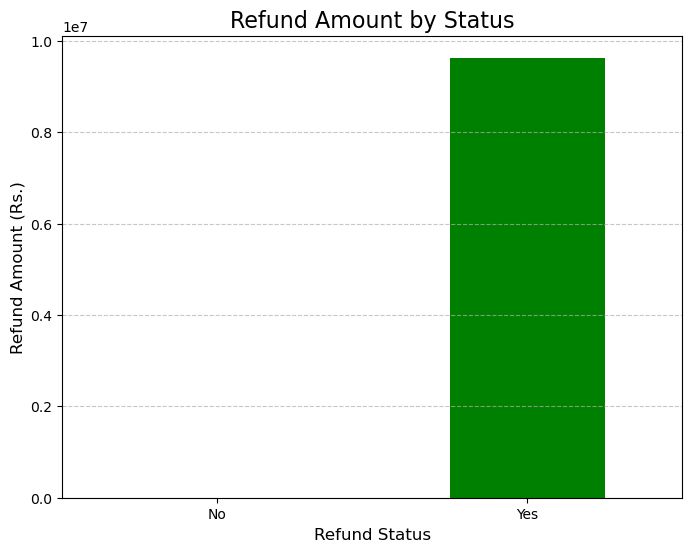

In [37]:
# Observation 1 Refund status
refund_data = data.groupby('refund_status')['refund_amount'].sum()
plt.figure(figsize=(8, 6))
refund_data.plot(kind='bar', color=['red', 'green'])
plt.title('Refund Amount by Status', fontsize=16)
plt.xlabel('Refund Status', fontsize=12)
plt.ylabel('Refund Amount (Rs.)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()

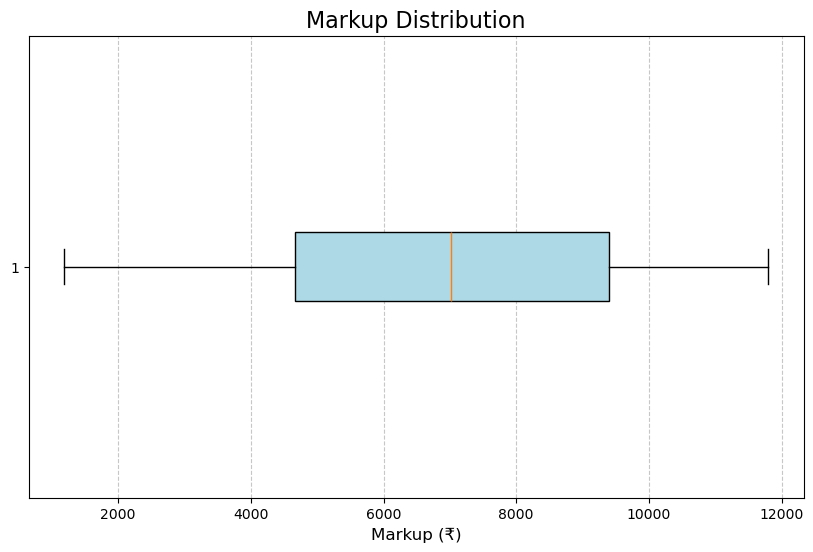

In [38]:
# Observation 2: High Variance in Markups
plt.figure(figsize=(10, 6))
plt.boxplot(data['markup'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Markup Distribution', fontsize=16)
plt.xlabel('Markup (₹)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

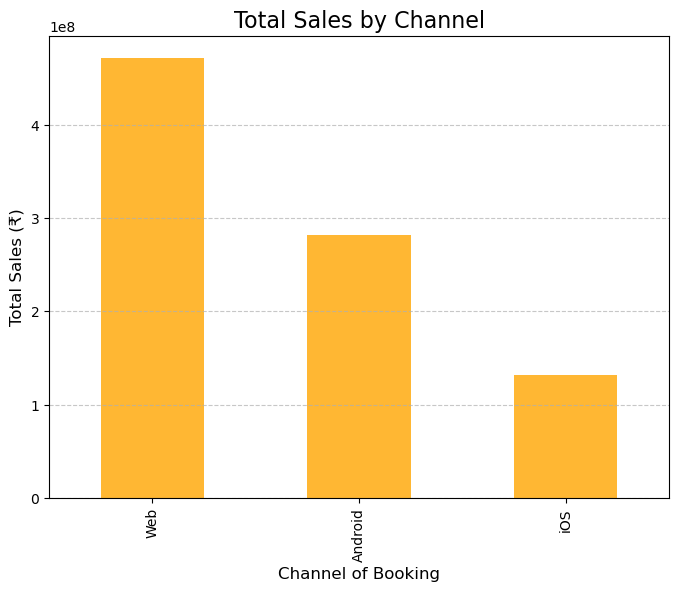

In [39]:
# Observation 3: Channel Sales Contribution
channel_sales = data.groupby('channel_of_booking')['selling_price'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
channel_sales.plot(kind='bar', color='orange', alpha=0.8)
plt.title('Total Sales by Channel', fontsize=16)
plt.xlabel('Channel of Booking', fontsize=12)
plt.ylabel('Total Sales (₹)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

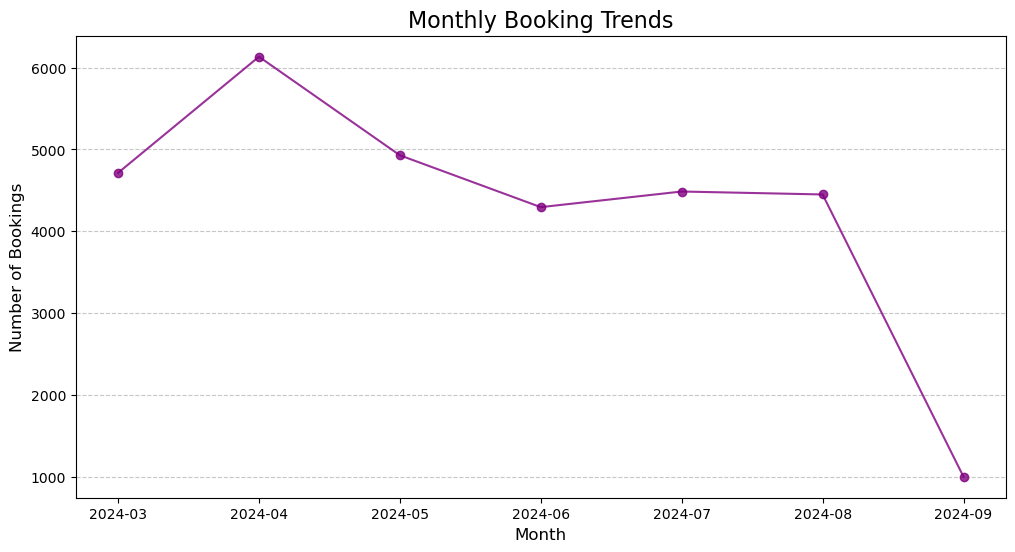

In [40]:
# Observation 4: Monthly Booking Trends
monthly_trends = data.groupby('booking_month').size()
plt.figure(figsize=(12, 6))
plt.plot(monthly_trends.index.astype(str), monthly_trends.values, marker='o', color='purple', alpha=0.8)
plt.title('Monthly Booking Trends', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

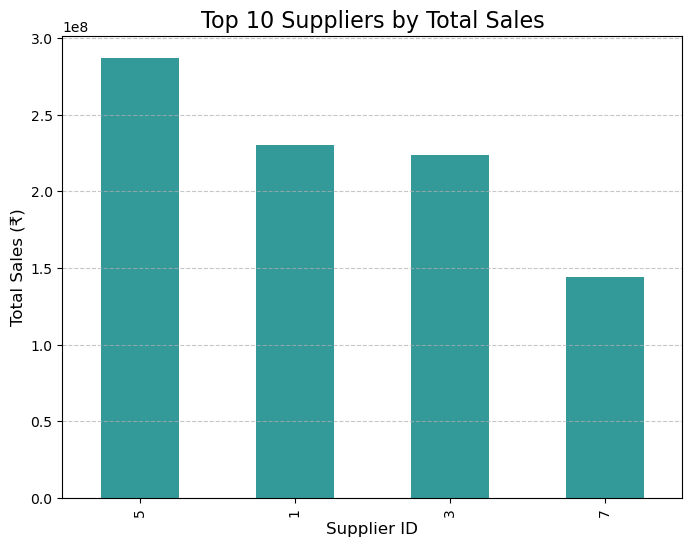

In [54]:
# Observation 5: Supplier dependence
supplier_sales = data.groupby('supplier_id')['selling_price'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
supplier_sales.plot(kind='bar', color='teal', alpha=0.8)
plt.title('Top 10 Suppliers by Total Sales', fontsize=16)
plt.xlabel('Supplier ID', fontsize=12)
plt.ylabel('Total Sales (₹)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

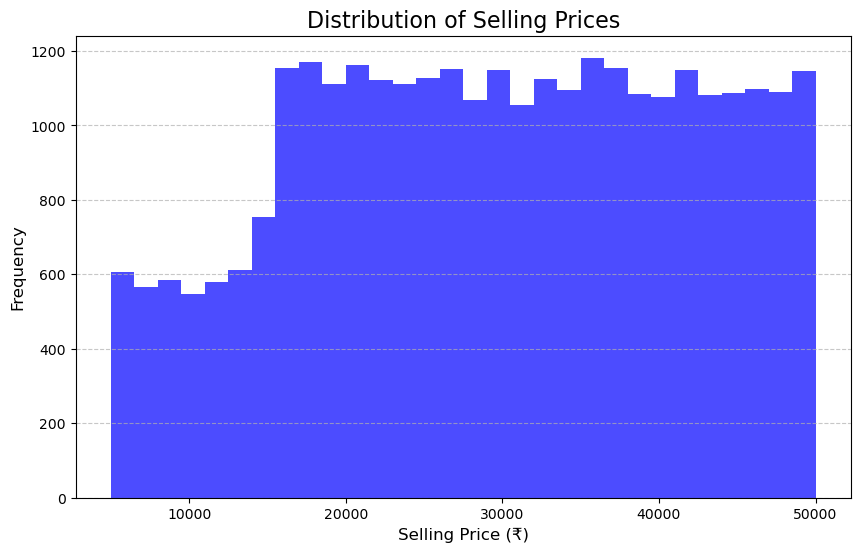

In [42]:
# Observation 6: Distribution of Selling Prices
plt.figure(figsize=(10, 6))
plt.hist(data['selling_price'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Selling Prices', fontsize=16)
plt.xlabel('Selling Price (₹)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

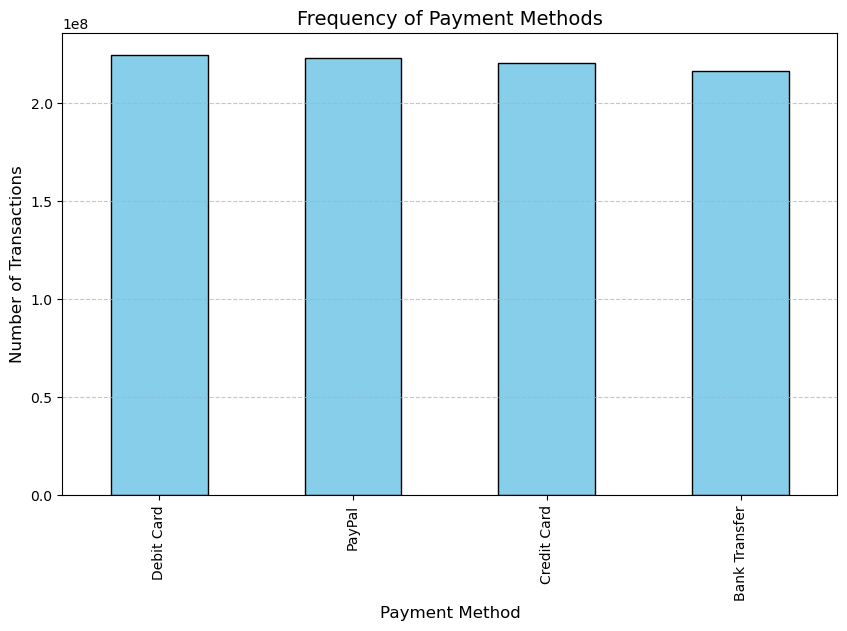

In [51]:
# Observation 7 : Payment Methods 
plt.figure(figsize=(10, 6))
payment_methods.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Payment Methods', fontsize=14)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()